![](../docs/banner.png)

# 🤖 Học máy có giám sát (Lecture 8)
---

## 🎯 Mục tiêu học tập

Sau khi hoàn thành bài học này, bạn sẽ:

- ✅ Hiểu rõ khái niệm Học máy có giám sát và hai dạng bài toán chính (hồi quy, phân loại)
- ✅ Biết cách xây dựng quy trình huấn luyện mô hình: chuẩn bị dữ liệu, chia train/test, huấn luyện và đánh giá
- ✅ Nắm các mô hình nền tảng: Linear/Logistic Regression, K-Nearest Neighbors, Decision Tree, Random Forest
- ✅ Đọc được các chỉ số đánh giá phổ biến (MSE, RMSE, Accuracy, Confusion Matrix, ROC-AUC)
- ✅ Thực hành end-to-end với 2 case thực tế: dự đoán giá nhà và phân loại ung thư vú

---

## 📍 Lộ trình bài giảng

```
Phần 1: Tổng quan về học máy có giám sát       ⭐ Dễ
    ├── Khái niệm, các loại bài toán
    ├── Quy trình dự án & train-test split
    └── Chỉ số đánh giá + underfitting/overfitting

Phần 2: Mô hình cốt lõi                       ⭐⭐ Trung bình
    ├── Linear & Logistic Regression
    ├── K-Nearest Neighbors (KNN)
    ├── Decision Tree
    └── Random Forest

Phần 3: Case study hồi quy (California Housing)  ⭐⭐ Trung bình
    ├── Chuẩn bị dữ liệu & EDA nhanh
    ├── Huấn luyện nhiều mô hình & so sánh RMSE
    └── Chọn mô hình tốt nhất và rút ra insight

Phần 4: Case study phân loại (Breast Cancer)   ⭐⭐⭐ Khó
    ├── Chuẩn hóa dữ liệu, huấn luyện 4 mô hình
    ├── So sánh Accuracy, Confusion Matrix, ROC
    └── Diễn giải kết quả để ra quyết định kinh doanh

Phần 5: Tổng kết & Bài tập
```

> **💡 Khuyến nghị học tập:** Đi tuần tự theo các phần, sau mỗi case study hãy dừng lại trả lời câu hỏi tổng kết.

> **🔧 Tương thích môi trường:** Notebook chạy tốt trên **Jupyter Notebook/Lab** và **Google Colab**. Nếu thiếu thư viện, hãy chạy cell cài đặt bên dưới.

---

## 🔧 Thiết lập môi trường

> **🎯 Mục tiêu:** Đảm bảo bạn có đầy đủ thư viện cần thiết trước khi thực hành.

- Nếu bạn đang dùng **Google Colab**: cứ chạy cell bên dưới, Colab sẽ tự cài nếu thiếu.
- Nếu bạn chạy **local** mà đã cài đủ, Python sẽ bỏ qua bước cài đặt.

In [1]:
# Cài đặt thư viện nếu chưa có (an toàn cho cả local và Google Colab)
import importlib
import subprocess
import sys

def ensure_package(pkg_name, install_name=None):
    install_name = install_name or pkg_name
    try:
        importlib.import_module(pkg_name)
        print(f"✅ {pkg_name} đã sẵn sàng")
    except ModuleNotFoundError:
        print(f"📦 Đang cài đặt {install_name} ...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", install_name])
        print(f"✅ Hoàn tất cài đặt {install_name}")

required_packages = {
    "pandas": "pandas",
    "numpy": "numpy",
    "matplotlib": "matplotlib",
    "seaborn": "seaborn",
    "sklearn": "scikit-learn"
}

for pkg, install_name in required_packages.items():
    ensure_package(pkg, install_name)

print("🎉 Thiết lập môi trường hoàn tất! Bạn đã sẵn sàng học tiếp.")

✅ pandas đã sẵn sàng
✅ numpy đã sẵn sàng
✅ matplotlib đã sẵn sàng
✅ seaborn đã sẵn sàng
✅ sklearn đã sẵn sàng
🎉 Thiết lập môi trường hoàn tất! Bạn đã sẵn sàng học tiếp.


In [2]:
# Import thư viện dùng xuyên suốt bài học
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="deep")

print("✅ Đã import toàn bộ thư viện cần thiết")

✅ Đã import toàn bộ thư viện cần thiết


---

## Phần 1. Tổng quan về Học máy có giám sát

### 1.1 Học máy có giám sát là gì?

Học máy có giám sát (Supervised Learning) là kỹ thuật trong đó dữ liệu **đầu vào (features)** đã có sẵn **nhãn (label)**. Mục tiêu là học hàm ánh xạ từ đầu vào đến đầu ra để dự đoán những trường hợp chưa thấy.

**Hai nhóm bài toán chính:**
- **Hồi quy (Regression):** Dự đoán biến liên tục — ví dụ dự báo doanh thu, giá nhà, điểm tín dụng.
- **Phân loại (Classification):** Dự đoán nhãn rời rạc — ví dụ phân loại email spam/không spam, khách hàng sẽ rời bỏ (churn) hay không.

> 🔁 Ngoài ra còn có Học không giám sát (Unsupervised) và Học củng cố (Reinforcement), nhưng không thuộc phạm vi của bài giảng này.

### 1.2 Quy trình chuẩn của một dự án Học máy

Dựa trên nội dung của bài giảng, quy trình điển hình gồm các bước lặp lại sau:

1. **Thu thập dữ liệu (Data Collection)**: có thể từ khảo sát, dữ liệu giao dịch, API, web scraping...
2. **Tiền xử lý & EDA**: làm sạch dữ liệu, xử lý thiếu/ngoại lai, chuẩn hóa, phân tích ban đầu để hiểu cấu trúc.
3. **Lựa chọn & Huấn luyện mô hình (Model Training)**: chọn các thuật toán phù hợp với bài toán và dữ liệu.
4. **Đánh giá mô hình (Evaluation)**: dùng tập kiểm tra / validation để đánh giá độ tổng quát hóa.
5. **Tinh chỉnh tham số (Hyperparameter Tuning)**: sử dụng GridSearchCV, RandomizedSearchCV... để tối ưu.
6. **Triển khai (Deployment)**: đưa mô hình vào sản phẩm thực tế (dashboard, API, ứng dụng).

**Chia dữ liệu Train/Test:**
- Phân tách theo tỷ lệ phổ biến 70/30 hoặc 80/20.
- Đảm bảo tập test chưa từng được mô hình nhìn thấy (giống như đề thi cuối kỳ).

### 1.3 Chỉ số đánh giá

| Bài toán | Chỉ số | Ý nghĩa | Khi sử dụng |
| --- | --- | --- | --- |
| Hồi quy | **MSE** (Mean Squared Error) | Trung bình bình phương sai số | Nhạy với sai số lớn, đơn vị bình phương |
| Hồi quy | **RMSE** | Căn bậc hai của MSE | Cùng đơn vị với biến mục tiêu, dễ diễn giải |
| Hồi quy | **$R^2$** | Tỷ lệ phương sai được giải thích | Giá trị gần 1 là tốt, nếu âm -> mô hình tệ |
| Phân loại | **Accuracy** | Tỷ lệ dự đoán đúng | Dùng khi dữ liệu cân bằng |
| Phân loại | **Confusion Matrix** | Bảng 2x2/ CxC mô tả TP/FP/FN/TN | Giúp hiểu sai lệch từng lớp |
| Phân loại | **Precision / Recall / F1** | Đánh giá sâu hơn khi dữ liệu lệch | Quan trọng trong y tế, tài chính |
| Phân loại | **ROC-AUC** | Đường cong ROC và diện tích | Đánh giá khả năng phân biệt giữa các lớp |

> 💡 Khi dữ liệu mất cân bằng (class imbalance), Accuracy có thể đánh lừa — hãy xem thêm Precision, Recall, F1, ROC-AUC.

### 1.4 Underfitting vs Overfitting

- **Underfitting (Dưới khớp):** Mô hình quá đơn giản, không học được quy luật — cả train và test đều yếu.
- **Overfitting (Quá khớp):** Mô hình quá phức tạp, học thuộc cả nhiễu — train tốt nhưng test kém.

**Giải pháp kiểm soát:**
- Thu thập thêm dữ liệu hoặc tạo thêm đặc trưng (feature engineering).
- Giảm/ tăng độ phức tạp mô hình (ví dụ pruning cây, điều chỉnh số láng giềng KNN).
- Sử dụng Regularization (L1/L2), Cross-validation, hoặc kỹ thuật ensemble để cân bằng.

---

## Phần 2. Các mô hình cốt lõi trong Học máy có giám sát

### 2.1 Linear Regression (Hồi quy tuyến tính)
- **Ý tưởng:** Tìm đường thẳng/siêu phẳng $y = w_0 + w_1 x_1 + ... + w_n x_n$ tối thiểu hóa MSE.
- **Ưu điểm:** Đơn giản, diễn giải rõ ràng, nhanh.
- **Lưu ý:** Giả định quan hệ tuyến tính, nhạy cảm với ngoại lai.
- **Ứng dụng:** Dự báo doanh thu, định giá bất động sản, dự đoán nhu cầu.

In [3]:
# Ví dụ mini: Hồi quy tuyến tính dự đoán lương từ số năm kinh nghiệm
experience = np.array([1, 1.5, 2.5, 3, 4, 5, 5.5, 6, 7, 8]).reshape(-1, 1)
salary = np.array([15, 18, 22, 25, 28, 35, 36, 40, 45, 52])

# Tính tay bằng numpy polyfit
coef, intercept = np.polyfit(experience.flatten(), salary, deg=1)
print(f"Hệ số góc (Polyfit): {coef:.2f}, Hệ số chặn: {intercept:.2f}")

# So sánh với scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(experience, salary)
print(f"Hệ số góc (LinearRegression): {lin_reg.coef_[0]:.2f}, Hệ số chặn: {lin_reg.intercept_:.2f}")

pred_salary = lin_reg.predict([[6.5]])
print(f"Dự đoán lương cho 6.5 năm kinh nghiệm: {pred_salary[0]:.2f} triệu VND")

Hệ số góc (Polyfit): 5.12, Hệ số chặn: 9.34
Hệ số góc (LinearRegression): 5.12, Hệ số chặn: 9.34
Dự đoán lương cho 6.5 năm kinh nghiệm: 42.60 triệu VND


### 2.2 Logistic Regression (Hồi quy logistic)
- **Ý tưởng:** Mô hình hóa xác suất thông qua hàm sigmoid $\sigma(z) = 1/(1+e^{-z})$.
- **Sử dụng:** Phân loại nhị phân (mua/không mua, đạt/trượt).
- **Ưu điểm:** Diễn giải được xác suất, nhanh, phù hợp dữ liệu tuyến tính.
- **Lưu ý:** Cần chuẩn hóa đặc trưng, dễ overfitting với dữ liệu nhiễu.

### 2.3 K-Nearest Neighbors (KNN)
- **Ý tưởng:** Dự đoán dựa trên đa số láng giềng gần nhất (K) trong không gian đặc trưng.
- **Ưu điểm:** Đơn giản, không cần giả định phân phối.
- **Nhược:** Tính toán chậm với dữ liệu lớn, nhạy với scale.
- **Ứng dụng:** Gợi ý sản phẩm tương đồng, phát hiện gian lận nhỏ.

### 2.4 Decision Tree (Cây quyết định)
- **Ý tưởng:** Xây dựng cây gồm các điều kiện "nếu - thì" để phân tách dữ liệu.
- **Ưu điểm:** Dễ diễn giải, xử lý tốt dữ liệu phi tuyến, hỗ trợ cả numeric & categorical.
- **Nhược:** Dễ overfit nếu không giới hạn độ sâu, số lá.
- **Ứng dụng:** Quy trình duyệt vay, phân loại khách hàng, đánh giá rủi ro.

### 2.5 Random Forest (Rừng ngẫu nhiên)
- **Ý tưởng:** Kết hợp nhiều cây quyết định (bagging) và lấy phiếu bầu đa số (classification) hoặc trung bình (regression).
- **Ưu điểm:** Độ chính xác cao, giảm overfitting so với cây đơn.
- **Lưu ý:** Khó diễn giải chi tiết, cần chọn số lượng cây phù hợp.
- **Ứng dụng:** Phân loại khách hàng tiềm năng, chấm điểm tín dụng, dự báo nhu cầu.

---

## Phần 3. Case study Hồi quy: Dự đoán giá nhà California

Dựa trên nội dung thực hành của bài giảng, chúng ta sẽ làm việc với bộ dữ liệu **California Housing** (Scikit-learn). Mục tiêu: dự đoán `MedHouseVal` (giá trị trung bình căn nhà, đơn vị 100.000 USD).

In [4]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['MedHouseVal'] = housing.target

df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 3.1 Khám phá dữ liệu nhanh

- Bộ dữ liệu có 20.640 quan sát, 8 đặc trưng.
- Biến mục tiêu `MedHouseVal` đã được chuẩn hóa về \(100.000 USD\).

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


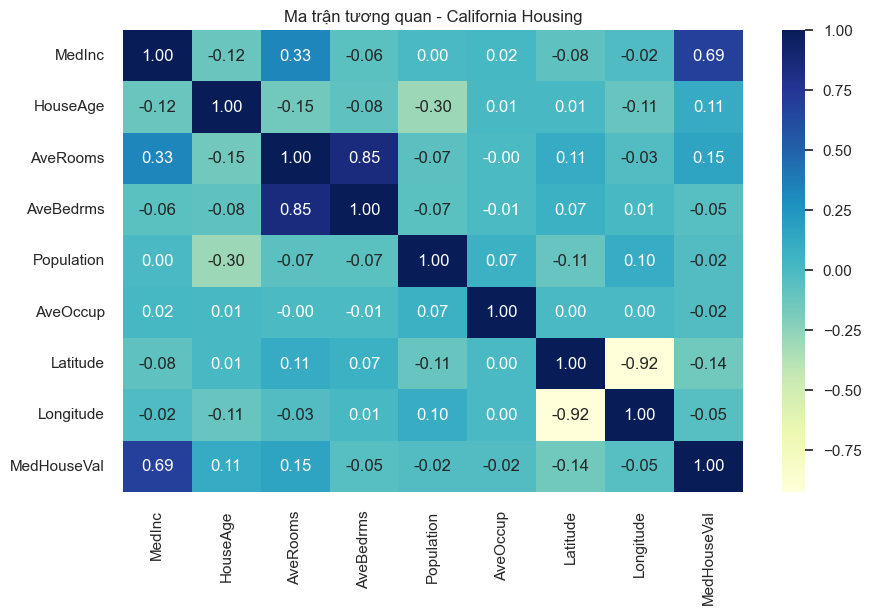

In [5]:
display(df_housing.describe().T)

corr = df_housing.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Ma trận tương quan - California Housing")
plt.show()

**Nhận xét nhanh:**
- `MedInc` (thu nhập trung vị) tương quan cao nhất với giá nhà.
- `AveRooms`, `Latitude`, `Longitude` cũng có mối quan hệ đáng chú ý.
- Cần chuẩn hóa các đặc trưng trước khi dùng KNN/Linear Regression.

### 3.2 Chuẩn bị dữ liệu

Các bước thực hiện:
1. Chia train/test 80/20.
2. Chuẩn hóa đặc trưng bằng `StandardScaler`.
3. Huấn luyện 4 mô hình và so sánh RMSE.

In [6]:
# Tách đặc trưng và mục tiêu
X = df_housing.drop('MedHouseVal', axis=1)
y = df_housing['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Kích thước X_train: {X_train.shape}, X_test: {X_test.shape}")

Kích thước X_train: (16512, 8), X_test: (4128, 8)


### 3.3 Huấn luyện & đánh giá mô hình hồi quy

In [ ]:
regression_models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=10),
    "Decision Tree": DecisionTreeRegressor(max_depth=6, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42)
}

results = []

for name, model in regression_models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    results.append({"Model": name, "RMSE": rmse, "R2": r2})
    print(f"{name:18s} | RMSE: {rmse:.4f} | R2: {r2:.4f}")

results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df

TypeError: got an unexpected keyword argument 'squared'

### 3.4 So sánh trực quan

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x="RMSE", y="Model", palette="crest")
plt.title("So sánh RMSE giữa các mô hình hồi quy")
plt.xlabel("RMSE (thấp hơn là tốt)")
plt.ylabel("")
plt.show()

**Insight:** Random Forest cho RMSE thấp nhất và $R^2$ cao nhất → mô hình ổn định, học được quan hệ phi tuyến. Linear Regression tuy đơn giản nhưng vẫn cho kết quả khá, phù hợp làm baseline.

### 3.5 Diễn giải mô hình Random Forest

Hãy xem Top 5 đặc trưng quan trọng theo Random Forest.

In [ ]:
best_rf = regression_models["Random Forest"]
importances = pd.Series(best_rf.feature_importances_, index=X.columns)

plt.figure(figsize=(8, 5))
importances.sort_values().tail(5).plot(kind='barh', color='teal')
plt.title("Top 5 đặc trưng quan trọng - Random Forest")
plt.xlabel("Độ quan trọng (feature importance)")
plt.show()

**Thông điệp cho nhà quản lý:** Thu nhập khu vực (`MedInc`) và vị trí địa lý (`Latitude`, `Longitude`) là yếu tố then chốt quyết định giá nhà. Các chiến lược đầu tư nên ưu tiên những khu vực thu nhập cao và vị trí thuận lợi.

---

## Phần 4. Case study Phân loại: Chẩn đoán ung thư vú

Sử dụng bộ dữ liệu **Breast Cancer Wisconsin** (Scikit-learn). Mục tiêu: phân loại khối u **Benign (lành tính)** hay **Malignant (ác tính)**.

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

print(cancer.DESCR.split('
')[0])
df_cancer.head()

### 4.1 Kiểm tra dữ liệu và tỷ lệ lớp

In [ ]:
df_cancer['target'].value_counts(normalize=True).rename({0: 'Malignant', 1: 'Benign'})

Bộ dữ liệu cân bằng tương đối tốt (≈37% ác tính, 63% lành tính).

### 4.2 Tiền xử lý dữ liệu

- Chuẩn hóa đặc trưng bằng `StandardScaler`.
- Chia train/test 80/20.
- Huấn luyện 4 mô hình phân loại và so sánh Accuracy.

In [ ]:
X_cls = df_cancer.drop('target', axis=1)
y_cls = df_cancer['target']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, stratify=y_cls, random_state=42
)

scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

print(f"Train size: {X_train_cls.shape}, Test size: {X_test_cls.shape}")

### 4.3 Huấn luyện & đánh giá mô hình phân loại

In [ ]:
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42),
    "KNN Classifier": KNeighborsClassifier(n_neighbors=9),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

cls_results = []

for name, model in classification_models.items():
    model.fit(X_train_cls_scaled, y_train_cls)
    preds = model.predict(X_test_cls_scaled)
    acc = accuracy_score(y_test_cls, preds)
    cls_results.append({"Model": name, "Accuracy": acc})
    print(f"{name:18s} | Accuracy: {acc:.4f}")

cls_results_df = pd.DataFrame(cls_results).sort_values(by="Accuracy", ascending=False)
cls_results_df

### 4.4 Confusion Matrix & báo cáo chi tiết

Phân tích sâu hơn với mô hình tốt nhất (Random Forest).

In [ ]:
best_clf = classification_models["Random Forest"]
conf_mat = confusion_matrix(y_test_cls, best_clf.predict(X_test_cls_scaled))

plt.figure(figsize=(5, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'])
plt.title("Confusion Matrix - Random Forest")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()

print(classification_report(y_test_cls, best_clf.predict(X_test_cls_scaled), target_names=['Malignant', 'Benign']))

### 4.5 Đường cong ROC

In [ ]:
y_prob = best_clf.predict_proba(X_test_cls_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cls, y_prob)
roc_auc = roc_auc_score(y_test_cls, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.3f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Đường cong ROC")
plt.legend(loc="lower right")
plt.show()

print(f"AUC = {roc_auc:.4f}")

**Thông điệp cho nhà quản lý:** Mô hình Random Forest đạt độ chính xác >97%, đặc biệt quan trọng khi ưu tiên giảm thiểu false negative (bỏ sót ca ác tính). Có thể triển khai hỗ trợ bác sĩ trong khâu sàng lọc ban đầu.

---

## Phần 5. Tổng kết & Bài tập luyện tập

### ✔️ Tổng kết nhanh
- Phân biệt được hồi quy vs phân loại, hiểu quy trình train-test split và đánh giá mô hình.
- Nắm đặc điểm 5 thuật toán nền tảng và khi nào nên dùng chúng.
- Random Forest tỏ ra hiệu quả ở cả hai bài toán nhờ khả năng học quan hệ phi tuyến và giảm overfitting.
- Việc chuẩn hóa đặc trưng (StandardScaler) rất quan trọng đối với các mô hình dựa trên khoảng cách như KNN hoặc các mô hình tuyến tính.

### 🧠 Câu hỏi tự kiểm tra
1. Khi dữ liệu mất cân bằng mạnh (ví dụ fraud detection), bạn sẽ ưu tiên chỉ số nào thay cho Accuracy?
2. Nếu mô hình Linear Regression cho RMSE cao, bạn sẽ thử những bước nào để cải thiện?
3. Vì sao cần chuẩn hóa dữ liệu trước khi dùng Logistic Regression hoặc KNN?

### 💼 Bài tập thực hành
- **Bài tập 1:** Áp dụng pipeline hồi quy cho một dataset khác (ví dụ `sklearn.datasets.fetch_openml('house_prices', version=1)`) và so sánh kết quả.
- **Bài tập 2:** Thử GridSearchCV để tinh chỉnh `n_estimators`, `max_depth` cho Random Forest ở cả hai case study.
- **Bài tập 3:** Tạo thêm biểu đồ giải thích đặc trưng quan trọng (Permutation Importance, SHAP) và viết báo cáo ngắn (200-300 chữ) cho lãnh đạo.

> 📌 **Tiếp nối:** Bài học tới chúng ta sẽ đi sâu vào **Feature Engineering nâng cao** và **Pipeline hoá quy trình học máy** để dễ dàng triển khai trong dự án thực tế.